### Objective:

The goal of the problem is to predict whether a client will default on the vehicle loan payment or not, given the recent data of all the loan transactions. This can help the institution to distinguish the future applicants who might default. For each ID in the Test Dataset, you must predict the “Default” level

### Importing neccesary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
import copy


from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,\
                            recall_score, f1_score, roc_auc_score, classification_report,\
                            roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

### Setting options

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/My Drive/TVS_HACKATHON')
os.getcwd()

'/content/drive/My Drive/TVS_HACKATHON'

### Reading the dataset

In [ ]:
# Reading the dataset

train=pd.read_csv('Train_Set_TVS.csv')
test=pd.read_csv('Test_Set_TVS.csv')
ref_test = copy.copy(test)

In [ ]:
#test_1=test.copy()

In [ ]:
train.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,...,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,...,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,...,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,...,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,...,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,132440.0,488938.279319,58568.207772,387652.0000,438095.5000,488952.5000,539702.0000,5.904070e+05
Compensation,126198.0,745051.897431,470276.230114,152728.0000,517706.0000,665996.0000,879489.0000,7.037702e+07
Loan_amt,132440.0,414801.133722,274678.779207,34275.0000,204529.9500,349542.5000,558205.0000,2.872142e+06
Annuity_amt,127829.0,10845.286442,2061.529355,5852.1000,9348.3700,10773.8200,12165.3900,4.130100e+04
density_Ind,127024.0,0.020446,0.015077,0.0001,0.0104,0.0204,0.0304,2.017800e+00
Home_Appliances,121476.0,3.220891,1.241751,1.0000,2.0000,4.0000,4.0000,1.900000e+01
Experience,110595.0,6.580616,6.357054,0.0000,2.1000,4.6000,9.0000,4.810000e+01
Dependents,132440.0,2.155467,0.909046,1.0000,2.0000,2.0000,3.0000,9.000000e+00
Company_Rating,120709.0,2.030553,0.503750,1.0000,2.0000,2.0000,2.0000,3.000000e+00
Age,132440.0,43.933260,11.962700,21.0000,34.0000,43.0000,54.0000,6.900000e+01


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  132440 non-null  int64  
 1   Compensation        126198 non-null  float64
 2   Vehicle_Status      123336 non-null  object 
 3   Loan_amt            132440 non-null  float64
 4   Annuity_amt         127829 non-null  float64
 5   density_Ind         127024 non-null  float64
 6   Job_Type            122192 non-null  object 
 7   Default_hist        132440 non-null  object 
 8   Prop_List           130475 non-null  object 
 9   Home_Appliances     121476 non-null  float64
 10  Region_Type         132440 non-null  object 
 11  Credit_Inq          129750 non-null  object 
 12  Education_det       132440 non-null  object 
 13  Marital_Stat        132440 non-null  object 
 14  Gen                 132440 non-null  object 
 15  Credit_Lnks         132440 non-nul

**Take aways**:

- Dataset has missing values
- 132440 rows and 33 columns
- ID is superflous feature, remove it

In [1]:
# Converting object to catogorical data type

def object_to_cat(dataset):
  for feature in dataset.columns:
     if dataset[feature].dtype == 'object':
       dataset[feature] = pd.Categorical(dataset[feature])
  dataset.head(10)

In [ ]:
#train=object_to_cat(train)
#test=object_to_cat(test)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  132440 non-null  int64  
 1   Compensation        126198 non-null  float64
 2   Vehicle_Status      123336 non-null  object 
 3   Loan_amt            132440 non-null  float64
 4   Annuity_amt         127829 non-null  float64
 5   density_Ind         127024 non-null  float64
 6   Job_Type            122192 non-null  object 
 7   Default_hist        132440 non-null  object 
 8   Prop_List           130475 non-null  object 
 9   Home_Appliances     121476 non-null  float64
 10  Region_Type         132440 non-null  object 
 11  Credit_Inq          129750 non-null  object 
 12  Education_det       132440 non-null  object 
 13  Marital_Stat        132440 non-null  object 
 14  Gen                 132440 non-null  object 
 15  Credit_Lnks         132440 non-nul

## Data Cleaning

In [ ]:
# Droping unwanted columns from all dataframes

def drop_col(dataset, col_to_drop):
    dataset.drop(col_to_drop, axis=1, inplace=True)
    return dataset

col_to_drop = ['ID','Annuity_amt', 'Day_Process', 'Ph.No', 'Region', 'Permanent_Addr_tag']
train = drop_col(train,col_to_drop)
test = drop_col(test,col_to_drop)

In [ ]:
# Displaying the unique values of the each feature

def display_unique_values(dataset, categorical_cols, info='count'):
    print("Unique values: ")  
    for col in categorical_cols:
        if(info == 'values'):
                print("{} : {}".format(col, dataset[col].unique()))
        elif(info == 'count'):
                print("{} : {}".format(col, len(dataset[col].unique())))
    return None

display_unique_values(train, train.columns, 'count')

Unique values: 
Compensation : 84096
Vehicle_Status : 3
Loan_amt : 119260
density_Ind : 418
Job_Type : 4
Default_hist : 2
Prop_List : 4
Home_Appliances : 14
Region_Type : 3
Credit_Inq : 5
Education_det : 3
Marital_Stat : 4
Gen : 2
Credit_Lnks : 3
Experience : 447
Income_Alt : 3
Type_Loan : 2
Dependents : 9
Company_Rating : 4
Age : 49
hour_Process : 26
Addr_permanent : 2
c1_rated : 870
c2_rated : 870
Contact_age : 3610
Product_bought : 25
Default : 2


In [ ]:
# Lets check % of missing values

percent_null=train.isnull().sum()/len(train)*100

In [ ]:
print(percent_null)

Compensation        4.713078
Vehicle_Status      6.874056
Loan_amt            0.000000
density_Ind         4.089399
Job_Type            7.737844
Default_hist        0.000000
Prop_List           1.483691
Home_Appliances     8.278466
Region_Type         0.000000
Credit_Inq          2.031108
Education_det       0.000000
Marital_Stat        0.000000
Gen                 0.000000
Credit_Lnks         0.000000
Experience         16.494262
Income_Alt          5.800362
Type_Loan           0.000000
Dependents          0.000000
Company_Rating      8.857596
Age                 0.000000
hour_Process        0.000000
Addr_permanent      0.000000
c1_rated           13.223346
c2_rated           10.058140
Contact_age         6.155995
Product_bought      0.000000
Default             0.000000
dtype: float64


In [ ]:
train= train.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
# Lets check % of missing values

percent_null_1=train.isnull().sum()/len(train)*100
print(percent_null_1)

Compensation        4.713078
Vehicle_Status      6.874056
Loan_amt            0.000000
density_Ind         4.089399
Job_Type            7.737844
Default_hist        0.000000
Prop_List           1.483691
Home_Appliances     8.278466
Region_Type         0.000000
Credit_Inq          2.031108
Education_det       0.000000
Marital_Stat        0.000000
Gen                 0.000000
Credit_Lnks         0.000000
Experience         16.494262
Income_Alt          5.800362
Type_Loan           0.000000
Dependents          0.000000
Company_Rating      8.857596
Age                 0.000000
hour_Process        0.000000
Addr_permanent      0.000000
c1_rated           13.223346
c2_rated           10.058140
Contact_age         6.155995
Product_bought      0.000000
Default             0.000000
dtype: float64


In [ ]:
print(train['Job_Type'].mode())
print(train['Prop_List'].mode())

0    IT
dtype: object
0    One
dtype: object


In [ ]:
# Imputing missing values with Mode

train['Job_Type'].fillna('IT', inplace=True)
train['Prop_List'].fillna('One', inplace=True)
train['Vehicle_Status'].fillna('N', inplace=True)
train['Credit_Inq'].fillna(1,inplace=True)
train['Income_Alt'].fillna('Not_Specified', inplace=True)

test['Job_Type'].fillna('IT', inplace=True)
test['Prop_List'].fillna('One', inplace=True)
test['Vehicle_Status'].fillna('N', inplace=True)
test['Credit_Inq'].fillna(1,inplace=True)
test['Income_Alt'].fillna('Not_Specified', inplace=True)

In [ ]:
# Imputing remaining missing values with Median values

train.fillna(train.median(), inplace=True)
test.fillna(test.median(), inplace=True)

In [ ]:
train.isnull().sum()

Compensation       0
Vehicle_Status     0
Loan_amt           0
density_Ind        0
Job_Type           0
Default_hist       0
Prop_List          0
Home_Appliances    0
Region_Type        0
Credit_Inq         0
Education_det      0
Marital_Stat       0
Gen                0
Credit_Lnks        0
Experience         0
Income_Alt         0
Type_Loan          0
Dependents         0
Company_Rating     0
Age                0
hour_Process       0
Addr_permanent     0
c1_rated           0
c2_rated           0
Contact_age        0
Product_bought     0
Default            0
dtype: int64

In [ ]:
test.isnull().sum()

Compensation       0
Vehicle_Status     0
Loan_amt           0
density_Ind        0
Job_Type           0
Default_hist       0
Prop_List          0
Home_Appliances    0
Region_Type        0
Credit_Inq         0
Education_det      0
Marital_Stat       0
Gen                0
Credit_Lnks        0
Experience         0
Income_Alt         0
Type_Loan          0
Dependents         0
Company_Rating     0
Age                0
hour_Process       0
Addr_permanent     0
c1_rated           0
c2_rated           0
Contact_age        0
Product_bought     0
dtype: int64

In [ ]:
train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
test.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [ ]:
train.shape

(132440, 27)

In [ ]:
# Checking the correlation between various varibales

train.corr()

,Compensation,Loan_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
Compensation,1.000000,0.259787,0.000507,-0.021215,0.037405,0.027659,-0.154870,-0.041124,0.062827,-0.014534,-0.014041,0.032155,0.017947,-0.001317
Loan_amt,0.259787,1.000000,0.000764,0.002351,0.076837,0.054520,-0.097264,0.049473,0.042255,0.005653,0.005408,0.061324,-0.029405,-0.008946
density_Ind,0.000507,0.000764,1.000000,0.001006,-0.002619,-0.000832,-0.009274,-0.001734,0.003018,-0.001438,-0.003249,-0.002945,0.000274,0.000969
Home_Appliances,-0.021215,0.002351,0.001006,1.000000,0.037625,-0.582533,-0.009957,0.311178,0.000966,0.007187,0.008106,-0.005260,0.029511,-0.003978
Experience,0.037405,0.076837,-0.002619,0.037625,1.000000,-0.006348,0.001029,0.191039,-0.002344,0.029976,0.031694,0.119263,-0.005627,-0.019105
Dependents,0.027659,0.054520,-0.000832,-0.582533,-0.006348,1.000000,0.029160,-0.264799,-0.011311,-0.003822,-0.003186,0.026091,-0.017262,0.002355
Company_Rating,-0.154870,-0.097264,-0.009274,-0.009957,0.001029,0.029160,1.000000,-0.005961,-0.221483,0.000467,0.001606,-0.022940,0.006053,0.014712
Age,-0.041124,0.049473,-0.001734,0.311178,0.191039,-0.264799,-0.005961,1.000000,-0.076291,0.057166,0.058673,0.075316,0.052711,-0.023211
hour_Process,0.062827,0.042255,0.003018,0.000966,-0.002344,-0.011311,-0.221483,-0.076291,1.000000,-0.011362,-0.010945,0.012945,-0.019775,-0.007573
c1_rated,-0.014534,0.005653,-0.001438,0.007187,0.029976,-0.003822,0.000467,0.057166,-0.011362,1.000000,0.883822,0.020344,-0.021153,-0.013626


In [ ]:
# Dropping irrelevant features

col_to_drop = ['density_Ind', 'hour_Process', 'Home_Appliances']
train_df = drop_col(train,col_to_drop)
test_df = drop_col(test,col_to_drop)

In [ ]:
train.shape

(132440, 24)

## Exploratary Data Analysis

In [ ]:
# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=['number']).columns
    return numeric_col


numeric_columns = numeric_features(train)
print("Numeric Features: \n {}".format(numeric_columns))
print("===="*20)

# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=['number']).columns
    return categorical_col

categorical_columns = categorical_features(train)
print("Categorical Features: \n {}".format(categorical_columns))

Numeric Features: 
 Index(['Compensation', 'Loan_amt', 'Experience', 'Dependents',
       'Company_Rating', 'Age', 'c1_rated', 'c2_rated', 'Contact_age',
       'Product_bought', 'Default'],
      dtype='object')
Categorical Features: 
 Index(['Vehicle_Status', 'Job_Type', 'Default_hist', 'Prop_List',
       'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen',
       'Credit_Lnks', 'Income_Alt', 'Type_Loan', 'Addr_permanent'],
      dtype='object')


In [ ]:
numeric_columns =['Compensation', 'Loan_amt', 'Experience', 'Company_Rating', 'Age',
       'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought', 'Default', 'Dependents']

categorical_columns = ['Vehicle_Status', 'Job_Type', 'Default_hist', 'Prop_List',
       'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen',
       'Credit_Lnks', 'Income_Alt', 'Type_Loan', 'Addr_permanent',]

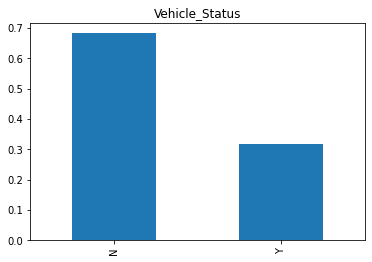

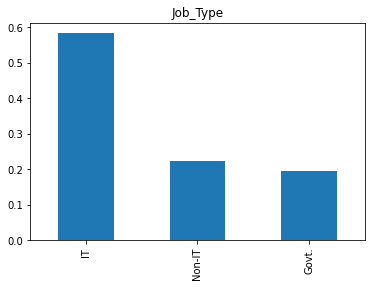

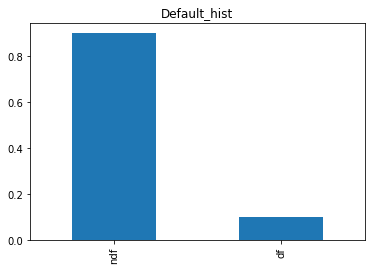

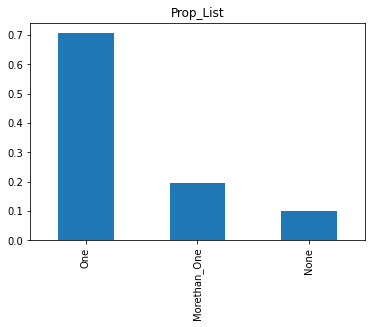

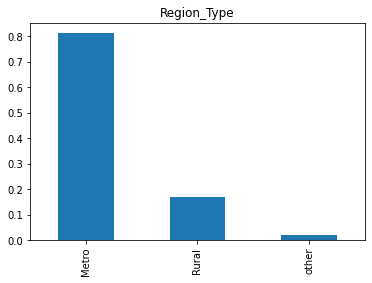

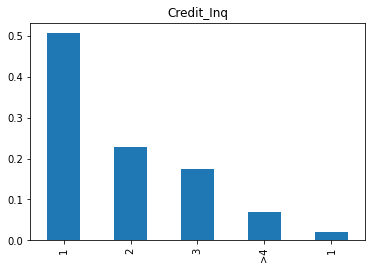

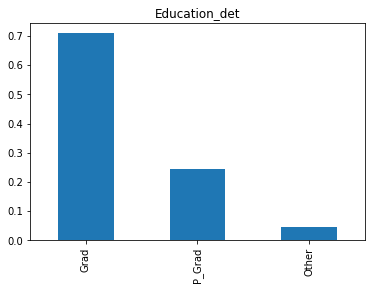

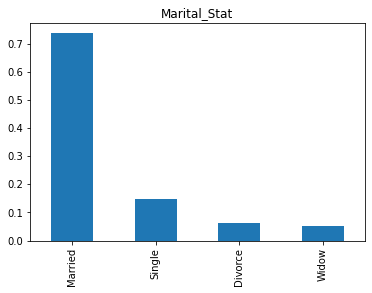

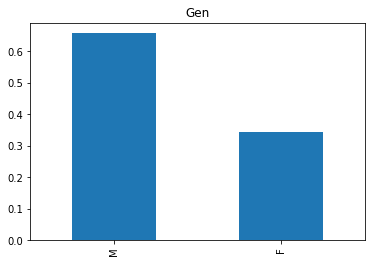

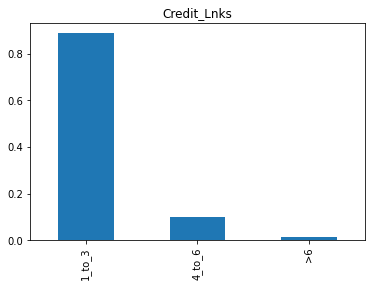

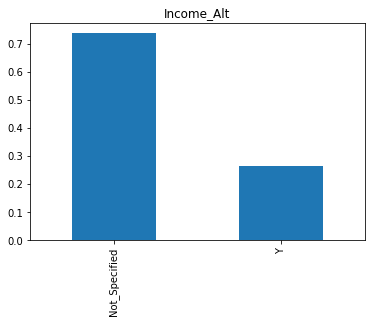

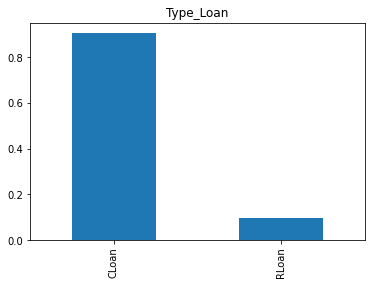

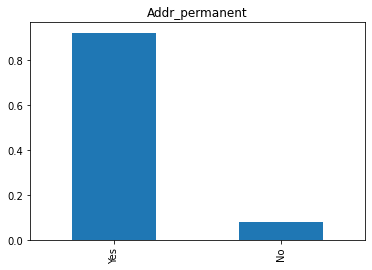

In [ ]:
# Function to perform univariate analysis of categorical columns
def plot_categorical_columns(dataframe, categorical_columns):
    dataframe = dataframe[categorical_columns]
    for i in dataframe:
        plt.title(i)
        dataframe[i].value_counts(normalize=True).plot(kind='bar')
        plt.show()
        
plot = plot_categorical_columns(train, categorical_columns)

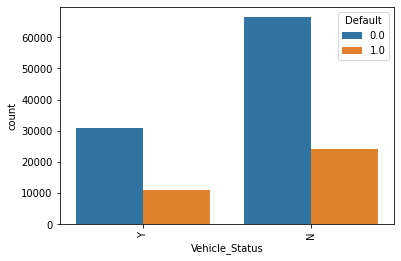

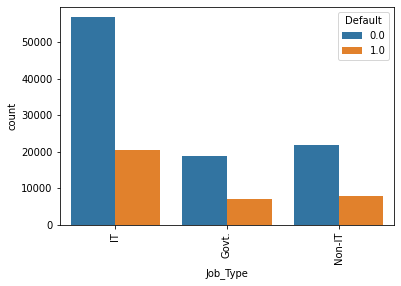

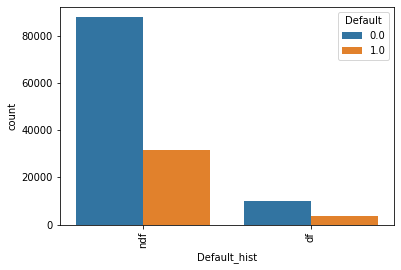

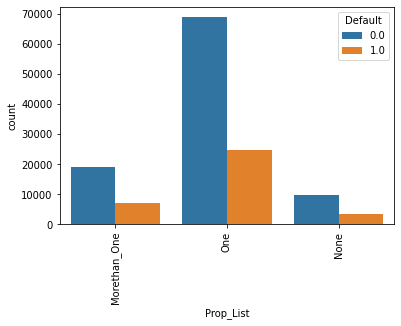

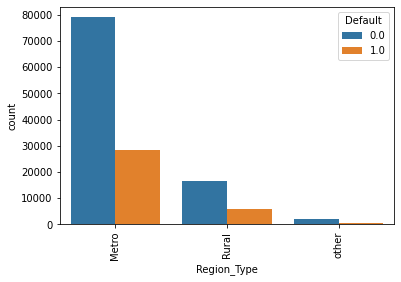

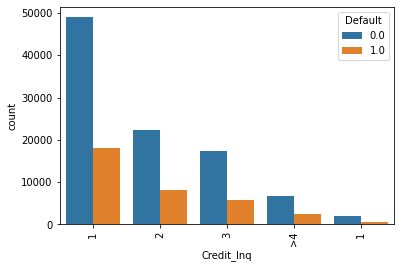

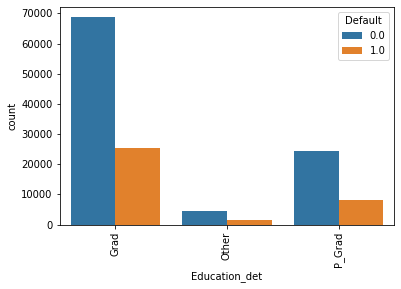

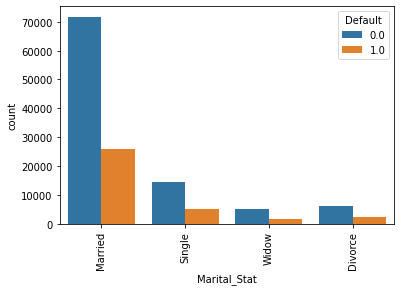

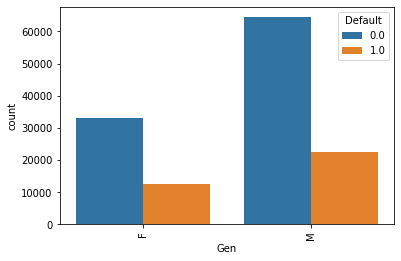

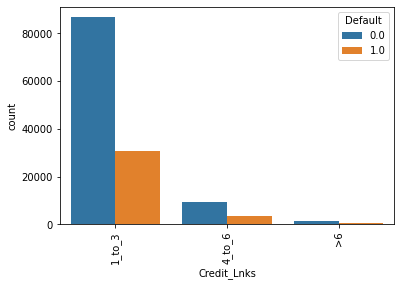

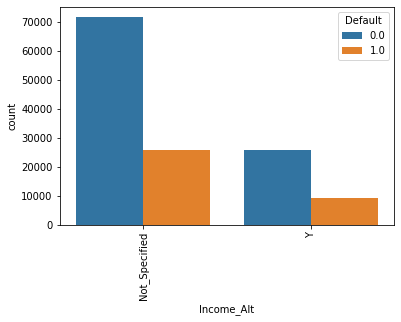

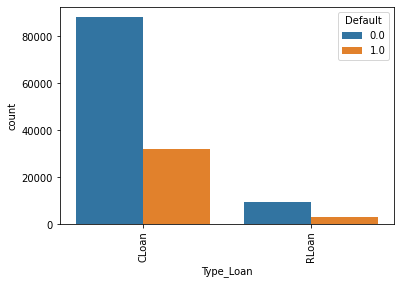

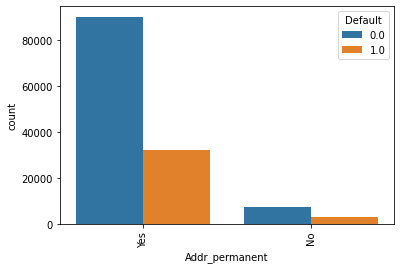

In [ ]:
def bivariate_analysis_categorical(dataframe,target, categorical_columns):
    cols = list(dataframe)
    for col in cols:
        if col in categorical_columns:
            sns.countplot(x=dataframe[col],hue=target,data=dataframe)
            plt.xticks(rotation='vertical')
            plt.show()
bivariate_analysis_categorical(train,train['Default'], categorical_columns)

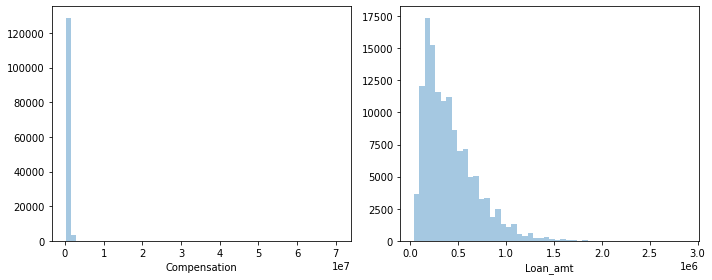

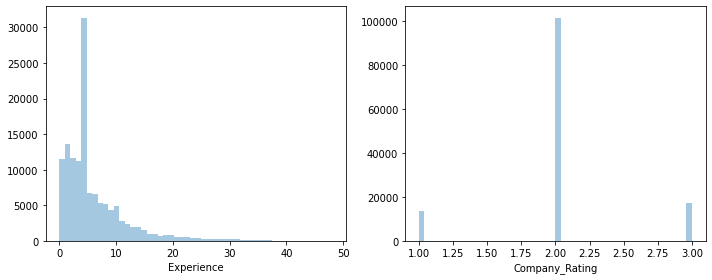

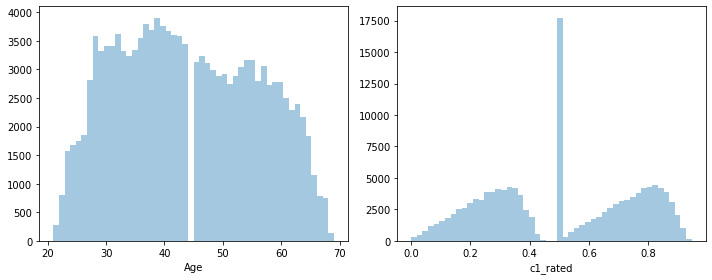

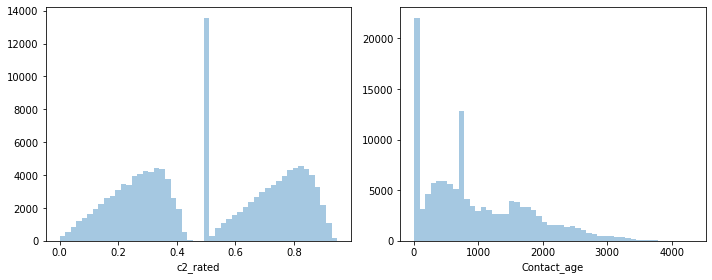

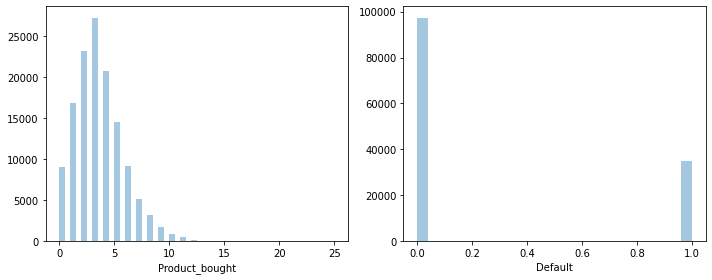

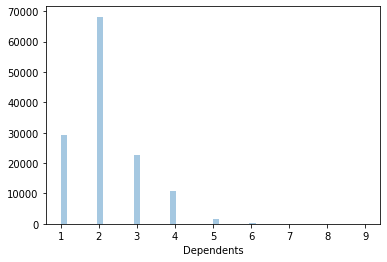

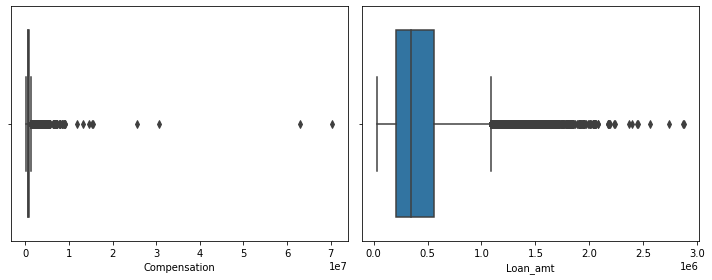

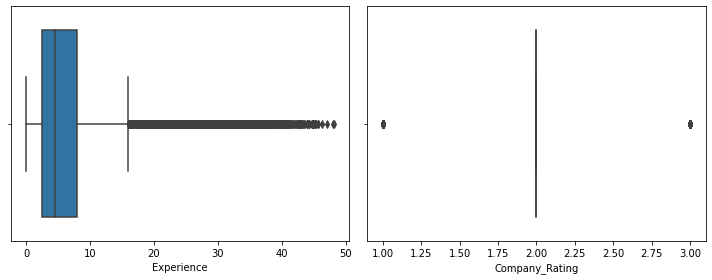

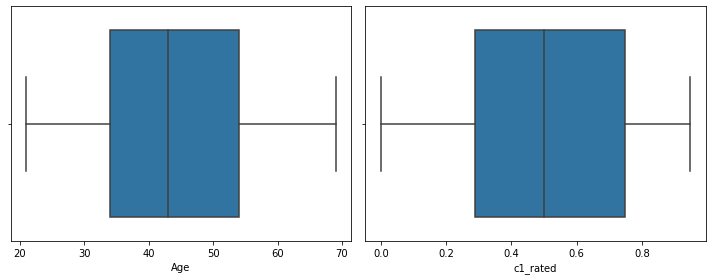

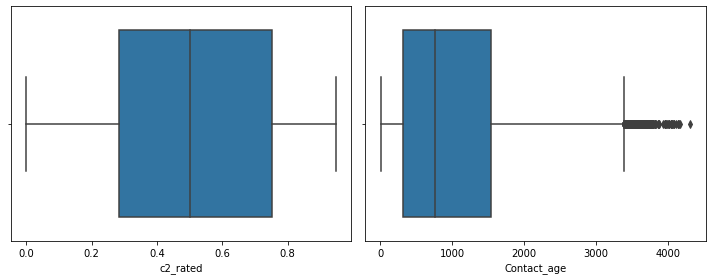

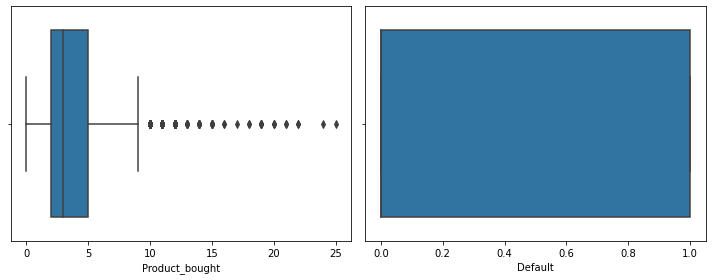

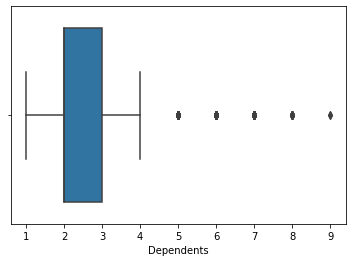

In [ ]:
# Function to plot histograms
def plot_continuous_columns(dataframe, numeric_columns):
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

# Function to plot boxplots
def plot_box_plots(dataframe, numeric_columns):
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])

plot_continuous_columns(train, numeric_columns)            
plot_box_plots(train, numeric_columns)

In [ ]:
# Function to detect outliers in every feature

def detect_outliers(dataframe, numeric_columns):
    cols = list(dataframe)
    
    for column in cols:
        if column in numeric_columns:
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)

            print(column + ' ---------', dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0])

detect_outliers(train, numeric_columns)

Compensation --------- 6118
Loan_amt --------- 3603
Experience --------- 8817
Dependents --------- 1760
Company_Rating --------- 30744
Age --------- 0
c1_rated --------- 0
c2_rated --------- 0
Contact_age --------- 367
Product_bought --------- 1468
Default --------- 0


In [ ]:
# Outlier treatment using Winsorization

from scipy.stats.mstats import winsorize
def treat_outliers(dataframe, numeric_columns):
    cols = list(dataframe)
    for col in cols:
        if col in numeric_columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


train = treat_outliers(train, numeric_columns)
print(detect_outliers(train, numeric_columns))

Compensation --------- 0
Loan_amt --------- 0
Experience --------- 0
Dependents --------- 0
Company_Rating --------- 30744
Age --------- 0
c1_rated --------- 0
c2_rated --------- 0
Contact_age --------- 0
Product_bought --------- 0
Default --------- 0
None


Highly Correlated Variables


c2_rated  c1_rated    0.883825
c1_rated  c2_rated    0.883825
dtype: float64

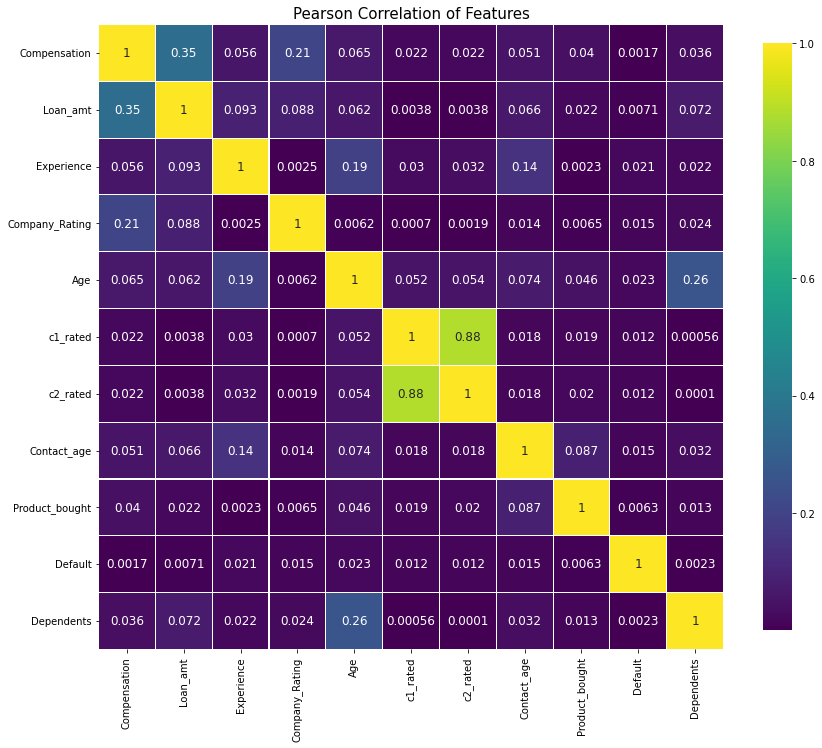

In [ ]:
#correlation heatmap of dataset

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr().abs(), 
        cmap = 'viridis',
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    
    correlation = df.corr().unstack().sort_values(kind='quicksort')
    print('Highly Correlated Variables')
    return correlation[((correlation>=0.75) | (correlation<=-0.75)) & (correlation!=1)]

correlation_heatmap(train[numeric_columns])

In [ ]:
# c1_rated and c2rated variables are highly corelated, therefore droping one varibale from them

corr_col_to_drop = ['c2_rated']
train_df = drop_col(train_df,corr_col_to_drop)
test_df = drop_col(test_df,corr_col_to_drop)

In [ ]:
train.head()

,Compensation,Vehicle_Status,Loan_amt,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,...,Income_Alt,Type_Loan,Dependents,Company_Rating,Age,Addr_permanent,c1_rated,Contact_age,Product_bought,Default
0,801850.0,Y,658040.0,IT,ndf,Morethan_One,Metro,1,Grad,Married,...,Not_Specified,CLoan,3.0,2.0,46.0,Yes,0.122,18.0,2.0,1.0
1,884222.0,N,198075.0,IT,ndf,Morethan_One,Metro,2,Grad,Married,...,Not_Specified,CLoan,3.0,1.0,46.0,Yes,0.184,306.0,4.0,0.0
2,363492.0,N,109130.0,Govt.,ndf,One,Metro,3,Other,Married,...,Not_Specified,CLoan,2.0,3.0,57.0,Yes,0.538,281.0,4.0,0.0
3,363492.0,N,179008.0,Non-IT,df,None,Metro,1,Grad,Married,...,Not_Specified,RLoan,3.0,2.0,39.0,Yes,0.500,20.0,4.0,0.0
4,1127878.0,Y,573715.0,Non-IT,ndf,Morethan_One,Rural,2,Grad,Married,...,Y,CLoan,3.0,1.0,32.0,Yes,0.500,2142.0,6.0,0.0


In [ ]:
train.columns

Index(['Compensation', 'Vehicle_Status', 'Loan_amt', 'Job_Type',
       'Default_hist', 'Prop_List', 'Region_Type', 'Credit_Inq',
       'Education_det', 'Marital_Stat', 'Gen', 'Credit_Lnks', 'Experience',
       'Income_Alt', 'Type_Loan', 'Dependents', 'Company_Rating', 'Age',
       'Addr_permanent', 'c1_rated', 'Contact_age', 'Product_bought',
       'Default'],
      dtype='object')

In [ ]:
train['Income_Alt'].unique()

array(['Not_Specified', 'Y'], dtype=object)

In [ ]:
# Encoding the categorical variables

replacestruct={'Vehicle_Status':{'Y':1, 'N':0},
               'Job_Type':{'Govt.':2,'IT':1, 'Non-IT':0},
               'Default_hist':{'df':1, 'ndf':0},
               'Prop_List':{'Morethan_One':2,'One':1,'None':0},
               'Gen':{'M':1, 'F':0},
               'Credit_Lnks':{'>6':2,'4_to_6':1,'1_to_3':0},
               'Type_Loan':{'CLoan':1, 'RLoan':0},
               'Addr_permanent':{'Yes':1, 'No':0},
               "Region_Type":{'Metro':2, 'other':1,'Rural':0},
               "Education_det":{'P_Grad':2,'Grad':1, 'Other':0},
               "Marital_Stat":{'Married':3, 'Single':2, 'Divorce':1,'Widow':0},
               'Income_Alt':{'Not_Specified':0, 'Y':1},
               'Credit_Inq':{'>4':4}}

In [ ]:
train=train.replace(replacestruct)
test=test.replace(replacestruct)

In [ ]:
train.head()

,Compensation,Vehicle_Status,Loan_amt,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,...,Income_Alt,Type_Loan,Dependents,Company_Rating,Age,Addr_permanent,c1_rated,Contact_age,Product_bought,Default
0,801850.0,1,658040.0,1,0,2,2,1,1,3,...,0,1,3.0,2.0,46.0,1,0.122,18.0,2.0,1.0
1,884222.0,0,198075.0,1,0,2,2,2,1,3,...,0,1,3.0,1.0,46.0,1,0.184,306.0,4.0,0.0
2,363492.0,0,109130.0,2,0,1,2,3,0,3,...,0,1,2.0,3.0,57.0,1,0.538,281.0,4.0,0.0
3,363492.0,0,179008.0,0,1,0,2,1,1,3,...,0,0,3.0,2.0,39.0,1,0.500,20.0,4.0,0.0
4,1127878.0,1,573715.0,0,0,2,0,2,1,3,...,1,1,3.0,1.0,32.0,1,0.500,2142.0,6.0,0.0


## Baseline model building & Feature engineering

####**Applying Baseline model.**
Initially we will create baseline model, where we will split the dataset into independent and dependent variables. 



There are many Classification algorithms are present in machine learning, which are used for different classification applications. Some of the main classification algorithms are as follows-

1. Logistic Regression

2. DecisionTree Classifier

3. RandomForest Classfier

4. XGBClassifier

5. GradientBoostingClassifier

In [ ]:
train_df=train.drop(['Default'], axis=1)
y=train['Default']

In [ ]:
train_df['Credit_Inq']=train_df.Credit_Inq.astype('int64')

In [ ]:
# Scale the data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

train_df=sc.fit_transform(train_df)
test=sc.fit_transform(test)

In [ ]:
train_df=pd.DataFrame(train_df)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.421226,1.468294,1.215987,0.044084,-0.333697,1.692882,0.473522,-0.814412,-0.396231,0.520382,...,-1.201703,-0.598282,0.323000,1.372553,-0.057893,0.198222,0.291037,-1.581436,-1.270882,-0.671172
1,0.778956,-0.681062,-0.896524,0.044084,-0.333697,1.692882,0.473522,0.221396,-0.396231,0.520382,...,-0.660932,-0.598282,0.323000,1.372553,-2.136900,0.198222,0.291037,-1.324631,-0.865448,0.437721
2,-1.482504,-0.681062,-1.305028,1.594408,-0.333697,-0.182309,0.473522,1.257204,-2.389123,0.520382,...,-0.248915,-0.598282,0.323000,-0.066111,2.021114,1.170896,0.291037,0.141640,-0.900641,0.437721
3,-1.482504,-0.681062,-0.984094,-1.506239,2.996733,-2.057499,0.473522,-0.814412,-0.396231,0.520382,...,-0.223164,-0.598282,-3.095971,1.372553,-0.057893,-0.420752,0.291037,-0.015756,-1.268066,0.437721
4,1.837121,1.468294,0.828702,-1.506239,-0.333697,1.692882,-2.185510,0.221396,-0.396231,0.520382,...,0.343358,1.671453,0.323000,1.372553,-2.136900,-1.039726,0.291037,-0.015756,1.719197,1.546614


In [ ]:
def run_baseline_model(model, dataframe, target):
    '''
    Performs model training and tests using ROC-AUC 
    returns AUC score
    '''
    X_train, X_val, y_train, y_val = train_test_split(dataframe, target, test_size=0.3, random_state= 0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    auc = roc_auc_score(y_val, y_pred)
    Classification_Report = classification_report(y_val,y_pred) 
    print('\n Model - \n {} \n AUC Score = {} %.2f'.format(str(model),(auc*100)))
    print(" Classification_Report", Classification_Report)
    print('===='*20)
    return None

models = [LogisticRegression,DecisionTreeClassifier, RandomForestClassifier,XGBClassifier,GradientBoostingClassifier]

for model in models:
    # run model
    model = model()
    run_baseline_model(model, train_df, y)
    


 Model - 
 LogisticRegression() 
 AUC Score = 50.0 %.2f
 Classification_Report               precision    recall  f1-score   support

         0.0       0.74      1.00      0.85     29268
         1.0       0.00      0.00      0.00     10464

    accuracy                           0.74     39732
   macro avg       0.37      0.50      0.42     39732
weighted avg       0.54      0.74      0.62     39732


 Model - 
 DecisionTreeClassifier() 
 AUC Score = 49.74122017596322 %.2f
 Classification_Report               precision    recall  f1-score   support

         0.0       0.74      0.71      0.72     29268
         1.0       0.26      0.28      0.27     10464

    accuracy                           0.60     39732
   macro avg       0.50      0.50      0.50     39732
weighted avg       0.61      0.60      0.60     39732


 Model - 
 RandomForestClassifier() 
 AUC Score = 50.037303555375004 %.2f
 Classification_Report               precision    recall  f1-score   support

         0.0    

## Hyperparameter tuning for Decision Tree model

In [ ]:
# Splitting the dataset and defining the model

X_train, X_test, y_train, y_test=train_test_split(train_df, y, test_size=0.20, random_state=1)

dtree=DecisionTreeClassifier()

In [ ]:
#Using max_depth, criterion will suffice for DT Models, rest all will remain constant 

parameters = {'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)
             }

In [ ]:
# Using RandomSearch CV

DT_grid  = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv = 5, verbose = True)

In [ ]:
DT_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10, 15, 20,
                                                      25),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [ ]:
DT_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='auto',
                       min_samples_split=4)

In [ ]:
DT_Model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, random_state=None, splitter='best')


In [ ]:
DT_Model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_split=4)

In [ ]:
y_pred=DT_Model.predict(X_test)

In [ ]:
Classification_Report_dt=classification_report(y_test, y_pred)
print(Classification_Report_dt)

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85     19479
         1.0       0.00      0.00      0.00      7009

    accuracy                           0.74     26488
   macro avg       0.37      0.50      0.42     26488
weighted avg       0.54      0.74      0.62     26488



In [ ]:
final_predict=DT_Model.predict(test)

In [ ]:
output_df=pd.DataFrame({'ID':ref_test['ID'], 'Default':final_predict})

In [ ]:
output_df

,ID,Default
0,487410,0.0
1,533258,0.0
2,581926,0.0
3,486301,0.0
4,580822,0.0
...,...,...
56755,513665,0.0
56756,450327,0.0
56757,476417,0.0
56758,461152,0.0


In [ ]:
#final_predict_dtree_best=dtree_best.predict(test)

In [ ]:
#output_df=pd.DataFrame({'ID':ref_test['ID'], 'Default':final_predict})

In [ ]:
output_df.to_csv('Submission_tvs_8.csv',index=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------